In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6


plt.style.use('fivethirtyeight')


In [2]:
train = pd.read_csv('TRAIN.csv')
test = pd.read_csv('TEST.csv')


In [3]:
x_train = train.drop('PE', axis = 1)
y_train = train['PE']

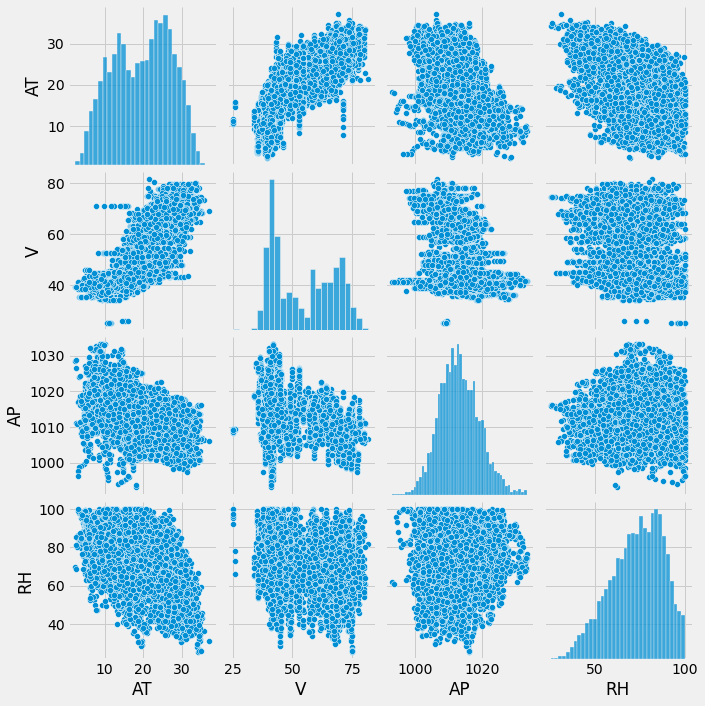

In [4]:
import seaborn as snb
snb.pairplot(x_train)

<AxesSubplot:>

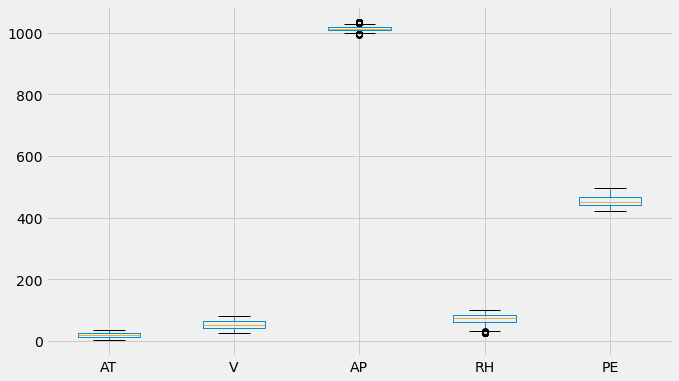

In [5]:
train.boxplot()

In [6]:
x_train.head()


,AT,V,AP,RH
0,22.85,60.29,1017.29,61.92
1,11.75,35.76,1018.99,57.92
2,12.24,44.90,1020.31,82.22
3,13.43,40.10,1015.82,87.90
4,4.65,35.19,1018.23,94.78


In [7]:
y_train.head()

0    448.58
1    473.01
2    464.25
3    471.77
4    489.36
Name: PE, dtype: float64

In [8]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x_train,y_train)

ExtraTreesRegressor()

In [9]:
print(model.feature_importances_)

[0.62041836 0.32289036 0.03512803 0.02156326]


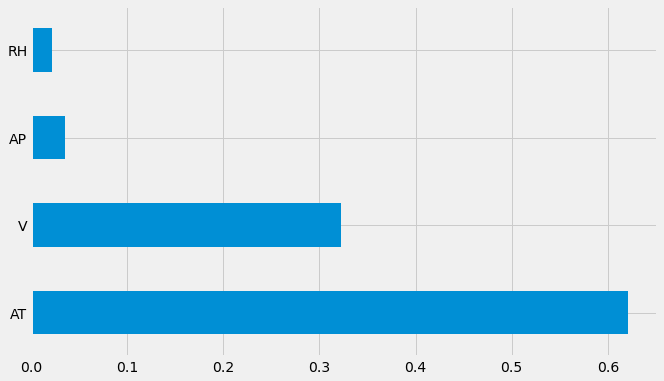

In [10]:
feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.0001, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(X_test)


In [12]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

In [13]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [14]:
from sklearn.model_selection import RandomizedSearchCV

In [15]:
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_feature = ["auto", 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [16]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_feature,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [17]:
rf = RandomForestRegressor()

In [22]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [23]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   9.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   9.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   8.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   9.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   9.5s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  13.2s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  7.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [24]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

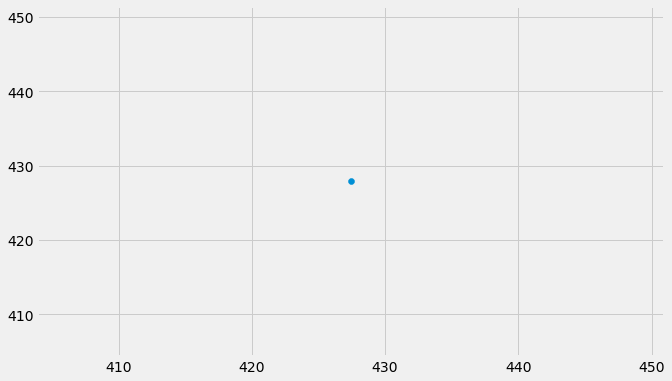

In [25]:
pred = rf_random.predict(X_test)
plt.scatter(y_test,pred)

/home/bash/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/bash/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


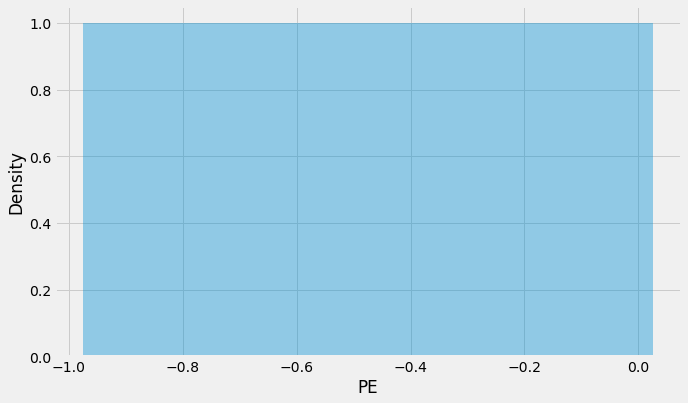

In [26]:
snb.distplot(y_test-pred)
from sklearn import metrics

In [27]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.4745299999967756
MSE: 0.22517872089693983
RMSE: 0.4745299999967756


In [28]:
errors = abs(pred - y_test)

In [29]:
mape = 100 * (errors/y_test)

In [30]:
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print("Accuracy", round(accuracy, 2),'%.')

Accuracy 99.89 %.


In [31]:
pred[0:100]

array([427.87453])

In [32]:
y_test.head()

3069    427.4
Name: PE, dtype: float64

In [33]:
df2=pd.read_csv('TEST.csv')

In [34]:
y_pred=rf_random.predict(df2)

In [35]:
y_pred

array([475.15059798, 487.0419886 , 463.2363275 , ..., 478.66375   ,
       454.51039   , 478.89913   ])

In [36]:
power_plant_submission = pd.DataFrame()
power_plant_submission["values"] = y_pred

In [37]:
power_plant_submission.head(20)

,values
0,475.150598
1,487.041989
2,463.236328
3,451.782767
4,479.473360
5,437.370143
6,450.399810
7,468.816982
8,460.048600
9,432.076155


In [38]:
power_plant_submission.to_csv("power plant.csv")